In [1]:
# For interactive plots, comment the next line
%pylab inline

# For interactive plots, uncomment the next line
# %pylab ipympl

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to load array data (numerical list, numpy array) data collected into a PODPAC node.

<small>*For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file.*</small>

## Setup

Make sure you have PODPAC installed:

```
$ pip install podpac
```


## Array Data

In [2]:
from podpac.data import Array
from podpac import Coordinates
import numpy as np

# mock data
data = np.random.rand(5, 5)
data

array([[0.05434547, 0.22265463, 0.94202175, 0.7041417 , 0.89754341],
       [0.02610628, 0.68212371, 0.27659068, 0.02481975, 0.939091  ],
       [0.92193146, 0.00863404, 0.02311135, 0.68541042, 0.65534103],
       [0.64122778, 0.74807851, 0.76044588, 0.6914329 , 0.24901176],
       [0.08703657, 0.61677963, 0.21263036, 0.63866548, 0.46835047]])

In [3]:
# create native coordinates for data
lat = np.linspace(-10, 10, 5)
lon = np.linspace(-10, 10, 5)
native_coords = Coordinates([lat, lon], ['lat', 'lon'])
native_coords

Coordinates (EPSG:4326)
	lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']

In [4]:
# create Array DataSource node
node = Array(source=data, native_coordinates=native_coords)
node

Array DataSource
	source: 
[[0.05434547 0.22265463 0.94202175 0.7041417  0.89754341]
 [0.02610628 0.68212371 0.27659068 0.02481975 0.939091  ]
 [0.92193146 0.00863404 0.02311135 0.68541042 0.65534103]
 [0.64122778 0.74807851 0.76044588 0.6914329  0.24901176]
 [0.08703657 0.61677963 0.21263036 0.63866548 0.46835047]]
	native_coordinates: 
		lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
		lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	interpolation: nearest

In [5]:
# evaluate this note at its native coordinates
output = node.eval(node.native_coordinates)
output

<xarray.UnitsDataArray (lat: 5, lon: 5)>
array([[0.05434547, 0.22265463, 0.94202175, 0.7041417 , 0.89754341],
       [0.02610628, 0.68212371, 0.27659068, 0.02481975, 0.939091  ],
       [0.92193146, 0.00863404, 0.02311135, 0.68541042, 0.65534103],
       [0.64122778, 0.74807851, 0.76044588, 0.6914329 , 0.24901176],
       [0.08703657, 0.61677963, 0.21263036, 0.63866548, 0.46835047]])
Coordinates:
  * lat      (lat) float64 -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 -10.0 -5.0 0.0 5.0 10.0
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x00000191CED54048>
    crs:          EPSG:4326

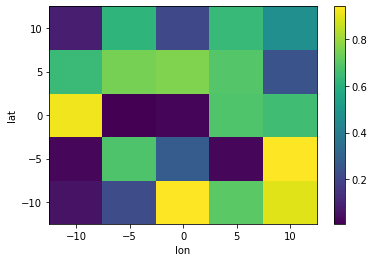

In [6]:
output.plot()
pass

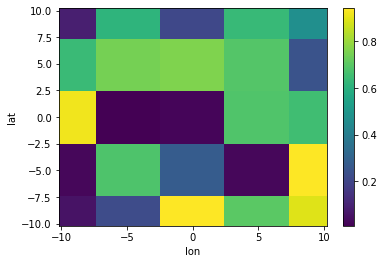

In [7]:
# scale down data (higher resolution)
# default interpolation is nearest neighbor
coords = Coordinates([np.linspace(-10, 10, 50), np.linspace(-10, 10, 50)], ['lat', 'lon'])
output = node.eval(coords)
output.plot()
pass

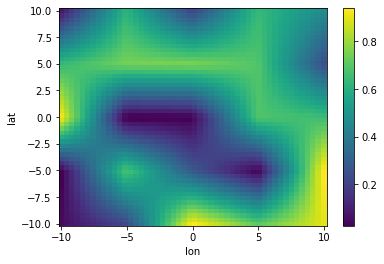

In [8]:
# scale down (higher resolution) and use bilinear interpolation
node.interpolation = 'bilinear'
output = node.eval(coords)
output.plot()
pass